<a href="https://colab.research.google.com/github/heilagrHelgi/classification-of-paintings/blob/main/diplom_test_%223_laba_CNN_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#zip_file = '/content/drive/MyDrive/imagesDiplom.zip'
zip_file = '/content/drive/MyDrive/for_diplom.zip'

In [6]:
import zipfile
with zipfile.ZipFile(zip_file,"r") as zip_ref:
    zip_ref.extractall()

In [7]:
base_dir = os.path.join(os.path.dirname('/content/for_diplom'), 'for_diplom') 
train_dir = os.path.join(base_dir, 'train') 
test_dir = os.path.join(base_dir, 'test')

In [8]:
zip_dir_base = os.path.dirname(base_dir)
!find $zip_dir_base -type d -print

/content
/content/.config
/content/.config/logs
/content/.config/logs/2023.05.23
/content/.config/configurations
/content/for_diplom
/content/for_diplom/train
/content/for_diplom/train/trainA
/content/for_diplom/train/trainB
/content/for_diplom/test
/content/for_diplom/test/testA
/content/for_diplom/test/testB
/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/Colab Notebooks
/content/drive/.shortcut-targets-by-id
/content/drive/.file-revisions-by-id
/content/drive/.Trash-0
/content/drive/.Trash-0/files
/content/drive/.Trash-0/info
/content/sample_data


In [9]:
train_cubism_dir = os.path.join(train_dir, 'trainA')
train_academism_dir = os.path.join(train_dir, 'trainB')

test_cubism_dir = os.path.join(test_dir, 'testA')
test_academism_dir = os.path.join(test_dir, 'testB')

In [10]:
num_train_cubism = len(os.listdir(train_cubism_dir))
num_train_academism = len(os.listdir(train_academism_dir))

total_train = num_train_cubism + num_train_academism

num_test_cubism = len(os.listdir(test_academism_dir))
num_test_academism = len(os.listdir(test_academism_dir))

total_test = num_test_cubism + num_test_academism

In [11]:
print('Всего изображений в обучающем наборе данных: ', total_train)
print('Всего изображений в тестовом наборе данных: ', total_test)

Всего изображений в обучающем наборе данных:  800
Всего изображений в тестовом наборе данных:  32


Для удобства мы вынесем установку переменных, которые нам понадобятся для дальнейшей обработки данных и тренировки модели, в отдельное объявление:

In [12]:
BATCH_SIZE = 32 # количество тренировочных изображений для обработки перед обновлением параметров модели


Подготовка данных


In [13]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [14]:

#import cv2
#import os
#import glob
#cv_img = []
#for img in glob.glob("/content/imagesDiplom/train/trainB/*.jpg"):
    #n = cv2.imread(img)
    #cv_img.append(n)

#print(cv_img[0][0][0])

In [15]:
#для конвейера
"""
import os, sys
from os import listdir

from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

# need to enter password to access your google drive

from google.colab import files
main_dir = train_cubism_dir
files = listdir(main_dir)
# you can change file extension below to read other image types
images_list = [i for i in files if i.endswith('.jpg')] ## output file names only
shirina = 10000
visota = 10000
for idx,image in enumerate(images_list):
  print(idx)
  img = Image.open(main_dir + "/" + image)
  print(img.size)
  if(img.width < shirina): 
    shirina = img.width
  if(img.height < visota): 
    visota = img.height
print(shirina, visota)
temp = 0
if (shirina > visota):
  temp = 1
  #plt.imshow(img)
  #img = img.resize((480, 600))
  #img.save(main_dir + image)
for idx,image in enumerate(images_list):
  #print(idx)
  img = Image.open(main_dir + "/" + image)
  if(shirina > visota):
    img = img.resize((visota, visota))
  if(shirina < visota):
    img = img.resize((shirina, shirina))
  img.save(main_dir + image)
"""

'\nimport os, sys\nfrom os import listdir\n\nfrom PIL import Image\nfrom google.colab import drive\nimport matplotlib.pyplot as plt\ndrive.mount(\'/content/drive\')\n\n# need to enter password to access your google drive\n\nfrom google.colab import files\nmain_dir = train_cubism_dir\nfiles = listdir(main_dir)\n# you can change file extension below to read other image types\nimages_list = [i for i in files if i.endswith(\'.jpg\')] ## output file names only\nshirina = 10000\nvisota = 10000\nfor idx,image in enumerate(images_list):\n  print(idx)\n  img = Image.open(main_dir + "/" + image)\n  print(img.size)\n  if(img.width < shirina): \n    shirina = img.width\n  if(img.height < visota): \n    visota = img.height\nprint(shirina, visota)\ntemp = 0\nif (shirina > visota):\n  temp = 1\n  #plt.imshow(img)\n  #img = img.resize((480, 600))\n  #img.save(main_dir + image)\nfor idx,image in enumerate(images_list):\n  #print(idx)\n  img = Image.open(main_dir + "/" + image)\n  if(shirina > visota):\

In [16]:
#if temp == 1:
  #IMG_SHAPE = visota # размерность к которой будет преведено входное изображение
#elif temp == 0:
   #IMG_SHAPE = shirina

После того как мы определили генераторы для набора тестовых и валидационных данных, метод flow_from_directory загрузит изображения с диска, нормализует данные и изменит размер изображений - всего лишь одной строкой кода:

In [17]:
IMG_SHAPE=550
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='binary')

Found 800 images belonging to 2 classes.


In [18]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=test_dir,
                                                              shuffle=False, #обучаем для кошек и собак сразу (подавались в случ порядке(мешает обуч выборку))
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='binary')

Found 32 images belonging to 2 classes.


Визуализируем изображения из тренировочного набора

In [19]:
sample_training_images, _ = next(train_data_gen)
sample_test_images, _ = next(val_data_gen)

Функция next возвращает блок изображений из набора данных. Один блок представляет собой кортеж из (множество изображений, множество меток). В данный момент мы отбросим метки, так как они нам не нужны - нас интересуют сами изображения.

In [20]:
# данная функция отрисует изображения в сетке размером 1х5
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

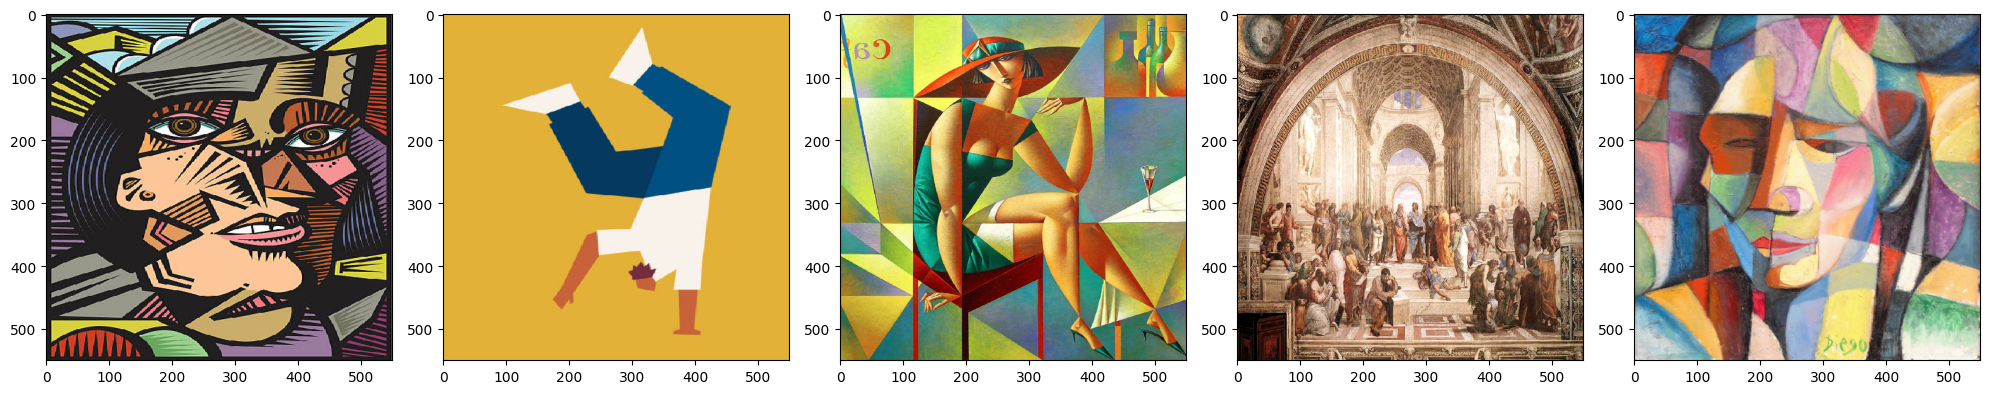

In [21]:
plotImages(sample_training_images[:5]) # отрисовываем изображения 0-4

Создание модели

In [22]:
# 1 архитектура 

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # увеличить разрешение изображения, описать архитектуру сети (какой слой за каким, преобразования, размерности), доработать сархитектуру сети, работа с данными.
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'), # предварительные преобразование изображений без потери качества (сжать или обрезать, лучше обрезать)
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [23]:
  """
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),

      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
    
      tf.keras.layers.Dropout(rate=0.25),

      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),

      tf.keras.layers.Dropout(rate=0.25),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
"""

"\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),\n\n    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2, 2),\n  \n    tf.keras.layers.Dropout(rate=0.25),\n\n    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),\n\n    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),\n    tf.keras.layers.MaxPooling2D(2, 2),\n\n    tf.keras.layers.Dropout(rate=0.25),\n\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(512, activation='relu'),\n    tf.keras.layers.Dropout(rate=0.5),\n    tf.keras.layers.Dense(1, activation='sigmoid')\n])\n"

In [24]:
# 3 архитектура
"""
from numba import cuda
cuda.select_device(0)
cuda.close()

model = tf.keras.models.Sequential([
    tf.keras.layers.ZeroPadding2D((1,1), input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    #tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.ZeroPadding2D((1,1)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    tf.keras.layers.ZeroPadding2D((1,1)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    tf.keras.layers.ZeroPadding2D((1,1)),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    tf.keras.layers.ZeroPadding2D((1,1)),

    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),

    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),

    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),
    tf.keras.layers.ZeroPadding2D((1,1)),

    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),

    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.ZeroPadding2D((1,1)),

    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
"""

"\nfrom numba import cuda\ncuda.select_device(0)\ncuda.close()\n\nmodel = tf.keras.models.Sequential([\n    tf.keras.layers.ZeroPadding2D((1,1), input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),\n    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),\n    #tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),\n    tf.keras.layers.ZeroPadding2D((1,1)),\n\n    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),\n    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),\n    tf.keras.layers.ZeroPadding2D((1,1)),\n\n    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),\n    tf.keras.layers.ZeroPadding2D((1,1)),\n\n    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),\n    tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2)),\n    tf.keras.layers.ZeroPadding2D((1,1)),\n\n    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),\n    tf.keras.layers.ZeroPadding2D((1,1)),\n\n    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),\n    tf.ker

**Компилирование модели**

Как и ранее мы воспользуемся оптимизатором adam. В качестве функции потерь воспользуемся sparse_categorical_crossentropy. Так же мы хотим на каждой обучающей итерации следить за точностью модели, поэтому передаём значение accuracy в параметр metrics:

In [25]:
#SGD - 87
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Представление модели

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 548, 548, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 274, 274, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 272, 272, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 136, 136, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 134, 134, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 67, 67, 128)      0

**Тренировка модели**

Так как обучающие блоки будут поступать из генератора (ImageDataGenerator) мы воспользуемся методом fit_generator вместо ранее используемого метода fit:

In [27]:
EPOCHS = 20
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_test / float(BATCH_SIZE)))
)
score = model.evaluate(val_data_gen, batch_size=BATCH_SIZE, verbose=1)
print("Test score:",score[0])
print("Test accuracy:", score[1])

<ipython-input-27-39de90e65b8a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
25/25 [==============================] - 40s 869ms/step - loss: 1.0650 - accuracy: 0.5213 - val_loss: 0.5446 - val_accuracy: 0.7812
Epoch 2/20
25/25 [==============================] - 17s 662ms/step - loss: 0.4783 - accuracy: 0.7900 - val_loss: 0.4708 - val_accuracy: 0.8125
Epoch 3/20
25/25 [==============================] - 17s 658ms/step - loss: 0.4091 - accuracy: 0.8125 - val_loss: 0.4160 - val_accuracy: 0.7812
Epoch 4/20
25/25 [==============================] - 21s 811ms/step - loss: 0.3456 - accuracy: 0.8425 - val_loss: 0.3902 - val_accuracy: 0.8750
Epoch 5/20
25/25 [==============================] - 17s 667ms/step - loss: 0.3092 - accuracy: 0.8788 - val_loss: 0.4292 - val_accuracy: 0.8125
Epoch 6/20
25/25 [==============================] - 17s 692ms/step - loss: 0.2844 - accuracy: 0.9000 - val_loss: 0.3513 - val_accuracy: 0.8750
Epoch 7/20
25/25 [==============================] - 17s 671ms/step - loss: 0.2191 - accuracy: 0.9150 - val_loss: 0.6043 - val_accuracy: 0.8750

Визуализация результатов тренировки

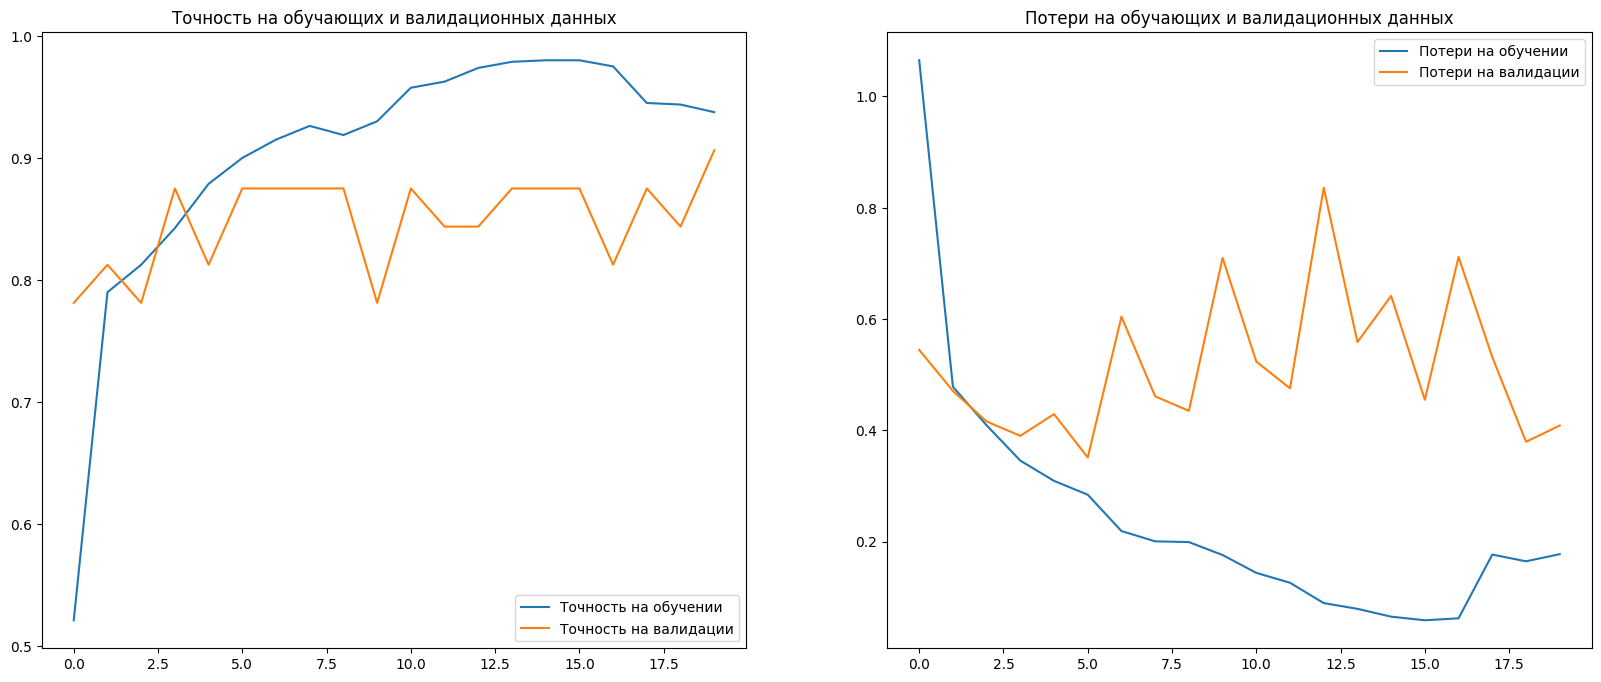

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на валидации')
plt.legend(loc='lower right')
plt.title('Точность на обучающих и валидационных данных')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении')
plt.plot(epochs_range, val_loss, label='Потери на валидации')
plt.legend(loc='upper right')
plt.title('Потери на обучающих и валидационных данных')
plt.savefig('./foo.png')
plt.show()

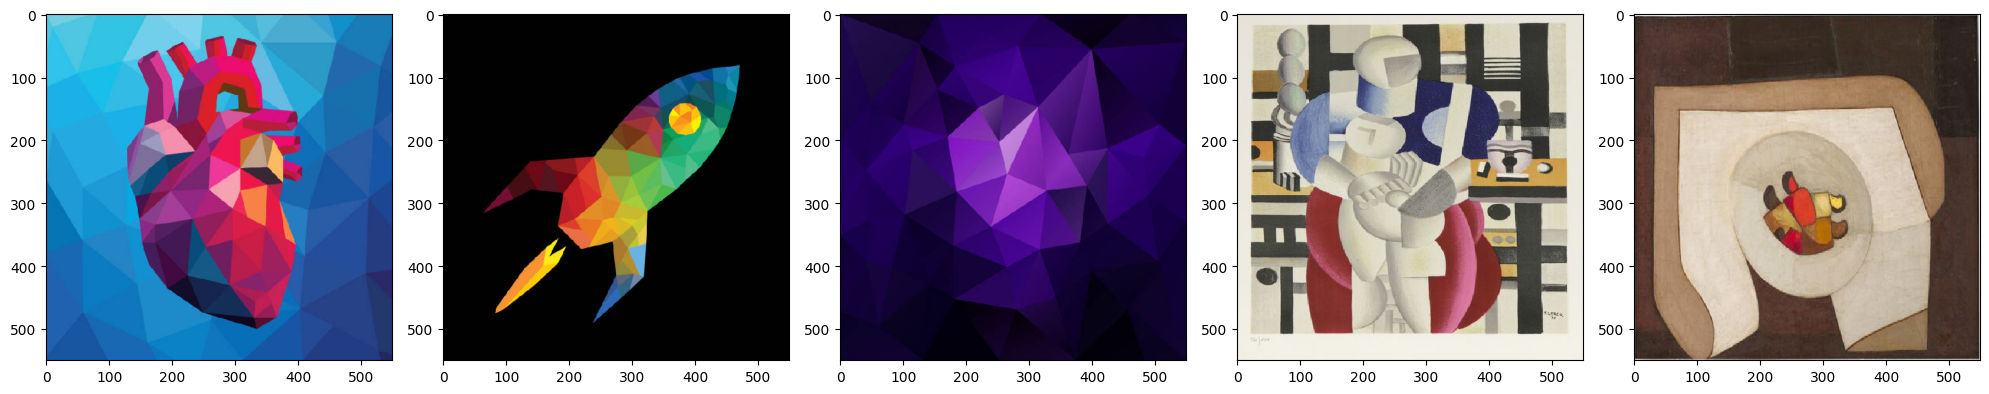

In [29]:
plotImages(sample_test_images[10:15])

In [30]:
y_pred=model.predict(sample_test_images[10:15])

1/1 [==============================] - 1s 729ms/step


In [31]:
y_pred[:5]

array([[7.8082678e-08],
       [9.9960500e-01],
       [1.6796678e-01],
       [6.3498062e-03],
       [1.6701329e-01]], dtype=float32)

In [32]:
y_pred[:5].round()

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)